In [4]:
# 1.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


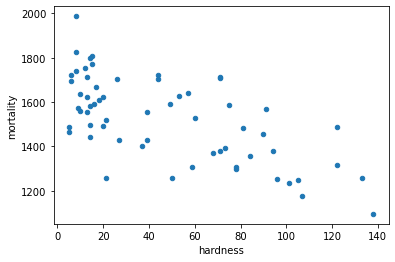

In [6]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [10]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [8]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X = df[['hardness']]
y = df['mortality']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [34]:
X_train.shape

(42, 1)

In [35]:
y_train.shape

(42,)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.coef_

array([-3.0493441])

In [38]:
model.intercept_

1679.9264716307484

In [39]:
y_pred = model.predict(X_test)
y_pred

array([1631.13696606, 1597.59418098, 1463.42304067, 1634.18631016,
       1643.33434245, 1664.67975114, 1274.3637066 , 1432.92959969,
       1661.63040704, 1655.53171885, 1625.03827787, 1457.32435248,
       1600.64352508, 1371.94271773, 1500.01516985, 1637.23565426,
       1451.22566428, 1442.07763199, 1387.18943822])

In [40]:
model.score(X_test, y_test)

0.5305131271695874

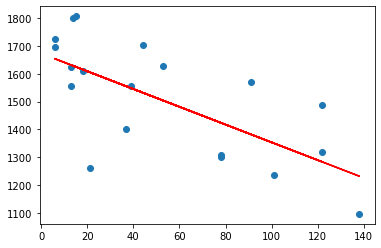

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [41]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [43]:
X_const = sm.add_constant(X_train)

In [44]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     23.55
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           1.89e-05
Time:                        10:37:31   Log-Likelihood:                -269.79
No. Observations:                  42   AIC:                             543.6
Df Residuals:                      40   BIC:                             547.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1679.9265     37.672     44.593      0.0

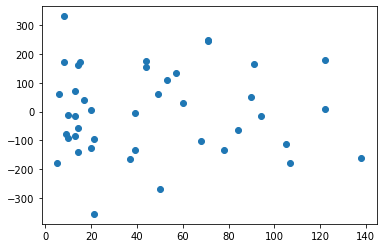

In [45]:
plt.scatter(X_const.iloc[:, 1], results.resid)

In [ ]:
# 1.Задача - ответить на вопрос есть ли связь между жёсткостью воды и
# средней годовой смертностью?
# По отчету выявляется нестрогая прямая зависимость от снижения жесткости воды и увеличением смертности. 
# А точнее, увеличение смертности в районах с очень мягкой водой.
# Коэффициенты корелляции находятся на среднем уровне, показывая наличие определенной взаимосвязи между показателями.
# Построенная регрессионная линейная модель доставточно оптимальна, если судить по стихийному характеру остатков.

In [51]:
# 2.
south_df = df.loc[df['location'] == 'South']
north_df = df.loc[df['location'] == 'North']

Text(0.5, 1.0, 'North')

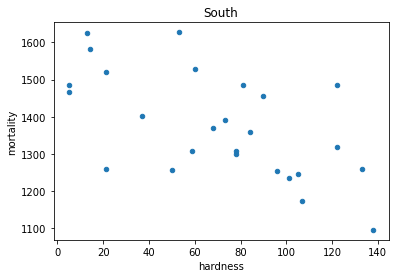

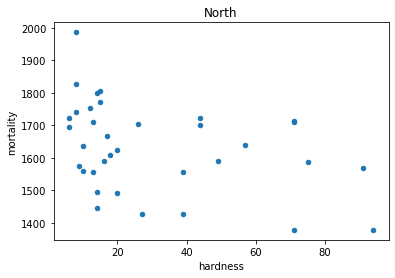

In [55]:
south_df.plot(kind='scatter', x='hardness', y='mortality')
plt.title('South')
north_df.plot(kind='scatter', x='hardness', y='mortality')
plt.title('North')

In [57]:
south_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [58]:
north_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [59]:
south_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [60]:
north_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [61]:
X_s = south_df[['hardness']]
y_s = south_df['mortality']
X_n = north_df[['hardness']]
y_n = north_df['mortality']

In [89]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.30)
model_s = LinearRegression()
model_s.fit(X_s_train, y_s_train)

LinearRegression()

In [90]:
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.30)
model_n = LinearRegression()
model_n.fit(X_n_train, y_n_train)

LinearRegression()

In [91]:
model_s.coef_

array([-1.95251909])

In [92]:
model_n.coef_

array([-1.49345658])

In [93]:
model_s.intercept_

1513.3228669334626

In [94]:
model_n.intercept_

1661.3783060309324

In [95]:
y_s_pred = model_s.predict(X_s_test)
model_s.score(X_s_test, y_s_test)

0.6078079948638433

In [96]:
y_n_pred = model_n.predict(X_n_test)
model_n.score(X_n_test, y_n_test)

0.07675734893664443

Text(0.5, 1.0, 'South')

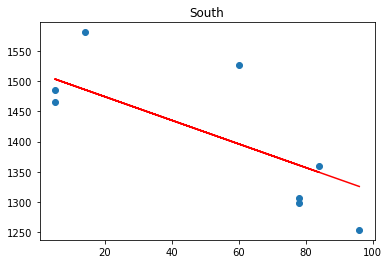

In [97]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')
plt.title('South') 

Text(0.5, 1.0, 'North')

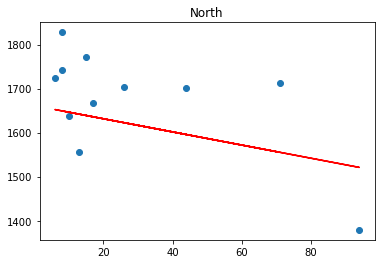

In [98]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')
plt.title('North') 

Text(0.5, 1.0, 'South')

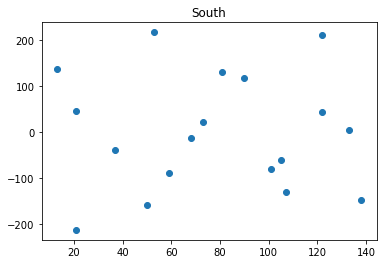

In [99]:
X_s_const = sm.add_constant(X_s_train)
s_model = sm.OLS(y_s_train, X_s_const)
results_s = s_model.fit()
plt.scatter(X_s_const.iloc[:, 1], results_s.resid)
plt.title('South') 

Text(0.5, 1.0, 'South')

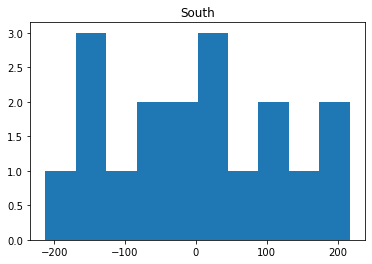

In [100]:
plt.hist(results_s.resid)
plt.title('South') 

Text(0.5, 1.0, 'North')

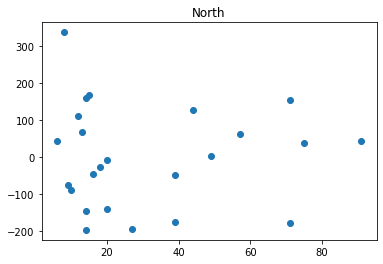

In [101]:
X_n_const = sm.add_constant(X_n_train)
n_model = sm.OLS(y_n_train, X_n_const)
results_n = n_model.fit()
plt.scatter(X_n_const.iloc[:, 1], results_n.resid)
plt.title('North') 

Text(0.5, 1.0, 'North')

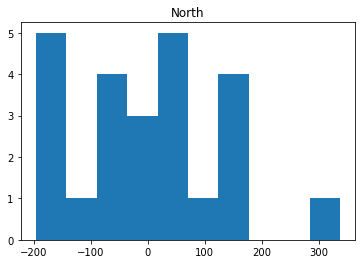

In [102]:
plt.hist(results_n.resid)
plt.title('North') 

In [ ]:
# 2.Сохраняется ли аналогичная зависимость для северных и южных городов
# по отдельности?
# Данные по областям немного разнятся, наиболее близкая к общей и очевидная зависимость наблюдается на Юге страны. 
# Данные по Северной части острова показывают и низкую оценку детерминации регрессии.